In [1]:
import laspy
import glob, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kitti_files = glob.glob('/nas2/YJ/DATA/kitti/training/velodyne/*.bin')

In [3]:
len(kitti_files)

7481

In [4]:
# This is the config in pointpillar.yaml
# https://github.com/open-mmlab/OpenPCDet/blob/master/tools/cfgs/kitti_models/pointpillar.yaml
'''
 POINT_CLOUD_RANGE: [0, -39.68, -3, 69.12, 39.68, 1]
 VOXEL_SIZE: [0.16, 0.16, 4]
 MAX_NUMBER_OF_VOXELS: {
            'train': 16000,
            'test': 40000
          }
'''

"\n POINT_CLOUD_RANGE: [0, -39.68, -3, 69.12, 39.68, 1]\n VOXEL_SIZE: [0.16, 0.16, 4]\n MAX_NUMBER_OF_VOXELS: {\n            'train': 16000,\n            'test': 40000\n          }\n"

In [5]:
# if voxel size is 0.16m, psuedo image be 432*496
x_voxel_size = 0.16
y_voxel_size = 0.16
x_range_min = 0.0
x_range_max = 69.12
y_range_min = -39.68
y_range_max = 39.68
z_range_min = -3
z_range_max = 1


x_size = int((x_range_max-x_range_min)/x_voxel_size)
y_size = int((y_range_max-y_range_min)/y_voxel_size)
pseudo_image = np.zeros((x_size, y_size))
print ('{}m and {}m of lidar is changed to {}px and {}px of pseudo_image'.format(
    x_range_max-x_range_min,
    y_range_max-y_range_min,
    pseudo_image.shape[0],
    pseudo_image.shape[1]))

69.12m and 79.36m of lidar is changed to 432px and 496px of pseudo_image


In [ ]:
# sampling 10 files randomly
idxes = np.random.randint(len(kitti_files), size=10)


images=[]
non_zeros=[]
for idx in idxes :
    print (100*'#')
    print ('file: ', kitti_files[idx])
    points = np.fromfile(kitti_files[idx], dtype=np.float32).reshape(-1, 4)
    print ('num_of_points: {}'.format(points.shape[0]))
    print ('range_of_x: {} to {}'.format(min(points[:,0]), max(points[:,0])))
    print ('range_of_y: {} to {}'.format(min(points[:,1]), max(points[:,1])))
    print ('range_of_z: {} to {}'.format(min(points[:,2]), max(points[:,2])))
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min <= point[0] <= x_range_max \
        and y_range_min <= point[1] <= y_range_max \
        and z_range_min <= point[2] <= z_range_max:
            r = int((point[0]-x_range_min)//x_voxel_size)
            c = int((point[1]-y_range_min)//y_voxel_size)
            pseudo_image[r,c] +=1
    images.append(pseudo_image)
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
    print ('non-zero_voxels: {} voxel'.format(non_x.shape[0]))
    print ('non-zero_ratio: {:.2f} %'.format(100* (non_x.shape[0]/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/10.0))

####################################################################################################
file:  /nas2/YJ/DATA/kitti/training/velodyne/005631.bin
num_of_points: 111654
range_of_x: -77.76799774169922 to 78.4209976196289
range_of_y: -56.43899917602539 to 38.435001373291016
range_of_z: -10.847000122070312 to 2.8949999809265137
non-zero_voxels: 6911 voxel
non-zero_ratio: 3.23 %
####################################################################################################
file:  /nas2/YJ/DATA/kitti/training/velodyne/004099.bin
num_of_points: 121237
range_of_x: -77.72599792480469 to 79.04900360107422
range_of_y: -30.267000198364258 to 75.64600372314453
range_of_z: -19.764999389648438 to 2.9100000858306885
non-zero_voxels: 12182 voxel
non-zero_ratio: 5.69 %
####################################################################################################
file:  /nas2/YJ/DATA/kitti/training/velodyne/005940.bin
num_of_points: 122692
range_of_x: -79.5770034790039 to 78.3820037

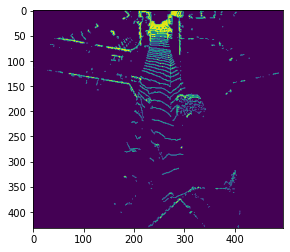

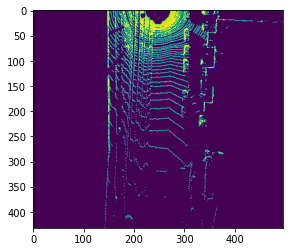

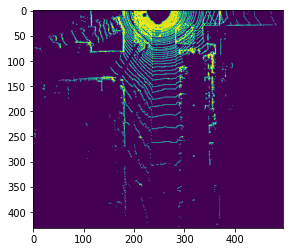

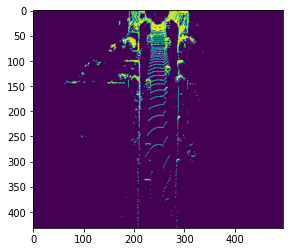

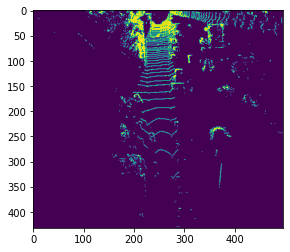

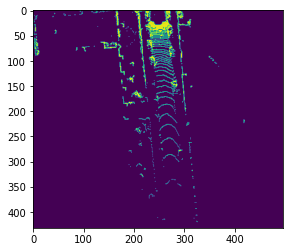

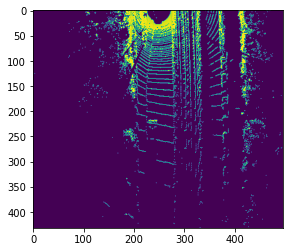

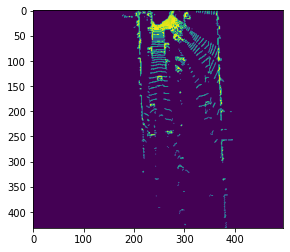

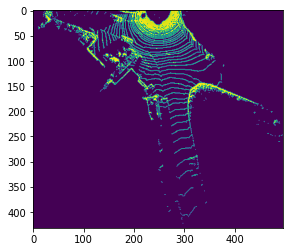

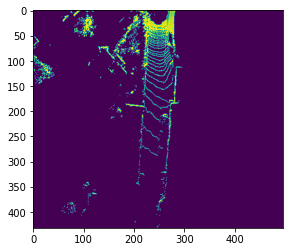

In [7]:
from PIL import Image
for img in images :
    img = Image.fromarray(np.uint8(img* 255), 'L')
    plt.figure()
    plt.imshow(img)

In [9]:
non_zeros=[]
for idx in range(len(kitti_files)) : 
    points = np.fromfile(kitti_files[idx], dtype=np.float32).reshape(-1, 4)
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min <= point[0] <= x_range_max \
        and y_range_min <= point[1] <= y_range_max \
        and z_range_min <= point[2] <= z_range_max:
            r = int((point[0]-x_range_min)//x_voxel_size)
            c = int((point[1]-y_range_min)//y_voxel_size)
            pseudo_image[r,c] +=1
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
print ('non-zero_ratio: {:.2f} %'.format(100* (sum(non_zeros)/len(kitti_files)/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/len(kitti_files)))

non-zero_ratio: 5.30 %
average number of non_zeros: 11345.82


In [10]:
non_zeros=[]
for idx in range(len(kitti_files)) : 
    points = np.fromfile(kitti_files[idx], dtype=np.float32).reshape(-1, 4)
    pseudo_image = np.zeros((x_size, y_size))
    for point in points :
        if x_range_min < point[0] < x_range_max \
        and y_range_min < point[1] < y_range_max \
        and z_range_min < point[2] < z_range_max:
            r = int((point[0]-x_range_min)//x_voxel_size)
            c = int((point[1]-y_range_min)//y_voxel_size)
            pseudo_image[r,c] +=1
    non_x, non_y = np.where(pseudo_image != 0)
    non_zeros.append(non_x.shape[0])
print ('non-zero_ratio: {:.2f} %'.format(100* (sum(non_zeros)/len(kitti_files)/(pseudo_image.shape[0] * pseudo_image.shape[1]))))
print ('average number of non_zeros: {:.2f}'.format(sum(non_zeros)/len(kitti_files)))

non-zero_ratio: 5.29 %
average number of non_zeros: 11344.97
